In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy import units as u
from astropy import constants as const
from scipy.optimize import curve_fit

In [2]:
df = pd.read_csv('solar_system.csv') # converts the csv file into a readable data set
print(df.shape) # prints how many rows and columns are in the data frame
df

(20, 11)


,Attribute,Mercury,Venus,Earth,Moon,Mars,Jupiter,Saturn,Uranus,Neptune,Pluto
0,Mass (10^24kg),0.330,4.87,5.97,0.073,0.642,1898,568,86.8,102,0.0130
1,Diameter (km),4879,12104,12756,3475,6792,142984,120536,51118,49528,2376
2,Density (kg/m^3),5429,5243,5514,3340,3934,1326,687,1270,1638,1850
3,Gravity (m/s^2),3.7,8.9,9.8,1.6,3.7,23.1,9.0,8.7,11.0,0.7
4,Escape Velocity (km/s),4.3,10.4,11.2,2.4,5.0,59.5,35.5,21.3,23.5,1.3
5,Rotation Period (hours),1407.6,-5832.5,23.9,655.7,24.6,9.9,10.7,-17.2,16.1,-153.3
6,Length of Day (hours),4222.6,2802.0,24.0,708.7,24.7,9.9,10.7,17.2,16.1,153.3
7,Distance from Sun (10^6 km),57.9,108.2,149.6,0.384,228.0,778.5,1432.0,2867.0,4515.0,5906.4
8,Perihelion (10^6 km),46.0,107.5,147.1,0.363,206.7,740.6,1357.6,2732.7,4471.1,4436.8
9,Aphelion (10^6 km),69.8,108.9,152.1,0.406,249.3,816.4,1506.5,3001.4,4558.9,7375.9


In [3]:
df = df.set_index("Attribute").T # sets the column 'attribute' to the first column, .T flips the columns and rows
df.index.name = "Planet" # names the first column 'planet'
df.reset_index(inplace=True) # turns the index back into a normal column
df.columns.name = None # removes the name of the column axis
print(df.shape)
df

(10, 21)


,Planet,Mass (10^24kg),Diameter (km),Density (kg/m^3),Gravity (m/s^2),Escape Velocity (km/s),Rotation Period (hours),Length of Day (hours),Distance from Sun (10^6 km),Perihelion (10^6 km),...,Orbital Period (days),Orbital Velocity (km/s),Orbital Inclination (deg),Orbital Eccentricity,Obliquity to Orbit (deg),Mean Temperature (C),Surface Pressure (bars),Number of Moons,Ring System?,Global Magnetic Field?
0,Mercury,0.330,4879,5429,3.7,4.3,1407.6,4222.6,57.9,46.0,...,88.0,47.4,7.0,0.206,0.034,167,0,0,No,Yes
1,Venus,4.87,12104,5243,8.9,10.4,-5832.5,2802.0,108.2,107.5,...,224.7,35.0,3.4,0.007,177.4,464,92,0,No,No
2,Earth,5.97,12756,5514,9.8,11.2,23.9,24.0,149.6,147.1,...,365.2,29.8,0.0,0.017,23.4,15,1,1,No,Yes
3,Moon,0.073,3475,3340,1.6,2.4,655.7,708.7,0.384,0.363,...,27.3,1.0,5.1,0.055,6.7,-20,0,0,No,No
4,Mars,0.642,6792,3934,3.7,5.0,24.6,24.7,228.0,206.7,...,687.0,24.1,1.8,0.094,25.2,-65,0.01,2,No,No
5,Jupiter,1898,142984,1326,23.1,59.5,9.9,9.9,778.5,740.6,...,4331,13.1,1.3,0.049,3.1,-110,Unknown,95,Yes,Yes
6,Saturn,568,120536,687,9.0,35.5,10.7,10.7,1432.0,1357.6,...,10747,9.7,2.5,0.052,26.7,-140,Unknown,274,Yes,Yes
7,Uranus,86.8,51118,1270,8.7,21.3,-17.2,17.2,2867.0,2732.7,...,30589,6.8,0.8,0.047,97.8,-195,Unknown,28,Yes,Yes
8,Neptune,102,49528,1638,11.0,23.5,16.1,16.1,4515.0,4471.1,...,59800,5.4,1.8,0.010,28.3,-200,Unknown,16,Yes,Yes
9,Pluto,0.0130,2376,1850,0.7,1.3,-153.3,153.3,5906.4,4436.8,...,90560,4.7,17.2,0.244,119.5,-225,0.00001,5,No,Unknown


In [4]:
# before transposing = (20, 11) after transposing = (10, 21)
# The structures are different because one of the rows got added onto the columns while being flipped

In [5]:
df.columns

Index(['Planet', 'Mass (10^24kg)', 'Diameter (km)', 'Density (kg/m^3)',
       'Gravity (m/s^2)', 'Escape Velocity (km/s)', 'Rotation Period (hours)',
       'Length of Day (hours)', 'Distance from Sun (10^6 km)',
       'Perihelion (10^6 km)', 'Aphelion (10^6 km)', 'Orbital Period (days)',
       'Orbital Velocity (km/s)', 'Orbital Inclination (deg)',
       'Orbital Eccentricity', 'Obliquity to Orbit (deg)',
       'Mean Temperature (C)', 'Surface Pressure (bars)', 'Number of Moons',
       'Ring System?', 'Global Magnetic Field?'],
      dtype='object')

In [6]:
# 15 columns have units
# 4 columns don't have units
# unit columns = mass, diameter, density, gravity, escape velocity, rotation period, length of day, distance from sun, perihelion, orbital period, orbital
# inclination, obliquity to orbit, mean temperature, surface pressure, 

# columns w/o units = orbital eccentricity, number of moons, ring system, global magnetic field

In [7]:
df

,Planet,Mass (10^24kg),Diameter (km),Density (kg/m^3),Gravity (m/s^2),Escape Velocity (km/s),Rotation Period (hours),Length of Day (hours),Distance from Sun (10^6 km),Perihelion (10^6 km),...,Orbital Period (days),Orbital Velocity (km/s),Orbital Inclination (deg),Orbital Eccentricity,Obliquity to Orbit (deg),Mean Temperature (C),Surface Pressure (bars),Number of Moons,Ring System?,Global Magnetic Field?
0,Mercury,0.330,4879,5429,3.7,4.3,1407.6,4222.6,57.9,46.0,...,88.0,47.4,7.0,0.206,0.034,167,0,0,No,Yes
1,Venus,4.87,12104,5243,8.9,10.4,-5832.5,2802.0,108.2,107.5,...,224.7,35.0,3.4,0.007,177.4,464,92,0,No,No
2,Earth,5.97,12756,5514,9.8,11.2,23.9,24.0,149.6,147.1,...,365.2,29.8,0.0,0.017,23.4,15,1,1,No,Yes
3,Moon,0.073,3475,3340,1.6,2.4,655.7,708.7,0.384,0.363,...,27.3,1.0,5.1,0.055,6.7,-20,0,0,No,No
4,Mars,0.642,6792,3934,3.7,5.0,24.6,24.7,228.0,206.7,...,687.0,24.1,1.8,0.094,25.2,-65,0.01,2,No,No
5,Jupiter,1898,142984,1326,23.1,59.5,9.9,9.9,778.5,740.6,...,4331,13.1,1.3,0.049,3.1,-110,Unknown,95,Yes,Yes
6,Saturn,568,120536,687,9.0,35.5,10.7,10.7,1432.0,1357.6,...,10747,9.7,2.5,0.052,26.7,-140,Unknown,274,Yes,Yes
7,Uranus,86.8,51118,1270,8.7,21.3,-17.2,17.2,2867.0,2732.7,...,30589,6.8,0.8,0.047,97.8,-195,Unknown,28,Yes,Yes
8,Neptune,102,49528,1638,11.0,23.5,16.1,16.1,4515.0,4471.1,...,59800,5.4,1.8,0.010,28.3,-200,Unknown,16,Yes,Yes
9,Pluto,0.0130,2376,1850,0.7,1.3,-153.3,153.3,5906.4,4436.8,...,90560,4.7,17.2,0.244,119.5,-225,0.00001,5,No,Unknown


In [8]:
df.dtypes

Planet                         object
Mass (10^24kg)                 object
Diameter (km)                  object
Density (kg/m^3)               object
Gravity (m/s^2)                object
Escape Velocity (km/s)         object
Rotation Period (hours)        object
Length of Day (hours)          object
Distance from Sun (10^6 km)    object
Perihelion (10^6 km)           object
Aphelion (10^6 km)             object
Orbital Period (days)          object
Orbital Velocity (km/s)        object
Orbital Inclination (deg)      object
Orbital Eccentricity           object
Obliquity to Orbit (deg)       object
Mean Temperature (C)           object
Surface Pressure (bars)        object
Number of Moons                object
Ring System?                   object
Global Magnetic Field?         object
dtype: object

In [9]:
# for col in df.columns:
#     print(df[col].apply(type))

In [10]:
# none are actual values, they are all strings
# because you can't use them to do math; they are imbedded as text not numbers

In [11]:
skip = ['Planet', 'Ring System?', 'Global Magnetic Field?']
for col in df.columns:
    if col not in skip:
        df[col] = pd.to_numeric(df[col], errors='coerce')
df.dtypes

Planet                          object
Mass (10^24kg)                 float64
Diameter (km)                    int64
Density (kg/m^3)                 int64
Gravity (m/s^2)                float64
Escape Velocity (km/s)         float64
Rotation Period (hours)        float64
Length of Day (hours)          float64
Distance from Sun (10^6 km)    float64
Perihelion (10^6 km)           float64
Aphelion (10^6 km)             float64
Orbital Period (days)          float64
Orbital Velocity (km/s)        float64
Orbital Inclination (deg)      float64
Orbital Eccentricity           float64
Obliquity to Orbit (deg)       float64
Mean Temperature (C)             int64
Surface Pressure (bars)        float64
Number of Moons                  int64
Ring System?                    object
Global Magnetic Field?          object
dtype: object

In [12]:
# three different types: object, float64, int64
# object = base class from which all the other classes inherit from
# int64 = 64 bit integer
# float64 = 64 bit decimal number
# the object ones are the ones without numbers because they wouldn't be a decimal or an integer number

In [13]:
def attach_units(df, old_col, unit, new_col=None):
    quantity = df[old_col].values * unit
    df[old_col] = quantity.value
    if new_col is not None:
        df.rename(columns={old_col: new_col}, inplace=True)

In [14]:
unit = 1e24 * u.kg
attach_units(df, old_col = "Mass (10^24kg)", unit=unit, new_col = "Mass (kg)")

In [15]:
semi_major_axis = (df['Perihelion (10^6 km)'] + df['Aphelion (10^6 km)']) / 2

In [16]:
semi_major_axis

0      57.9000
1     108.2000
2     149.6000
3       0.3845
4     228.0000
5     778.5000
6    1432.0500
7    2867.0500
8    4515.0000
9    5906.3500
dtype: float64

In [17]:
df.insert(loc = 11, column = 'Semi-Major Axis (10^6 km)', value = semi_major_axis)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Planet                       10 non-null     object 
 1   Mass (kg)                    10 non-null     float64
 2   Diameter (km)                10 non-null     int64  
 3   Density (kg/m^3)             10 non-null     int64  
 4   Gravity (m/s^2)              10 non-null     float64
 5   Escape Velocity (km/s)       10 non-null     float64
 6   Rotation Period (hours)      10 non-null     float64
 7   Length of Day (hours)        10 non-null     float64
 8   Distance from Sun (10^6 km)  10 non-null     float64
 9   Perihelion (10^6 km)         10 non-null     float64
 10  Aphelion (10^6 km)           10 non-null     float64
 11  Semi-Major Axis (10^6 km)    10 non-null     float64
 12  Orbital Period (days)        10 non-null     float64
 13  Orbital Velocity (km/s)

In [19]:
# df['Semi-Major Axis (10^6 km)']

In [20]:
quantity = df['Orbital Period (days)'].values * u.day
new = quantity.to(u.yr).value  
df['Orbital Period (days)'] = new

In [21]:
df.rename(columns = {'Orbital Period (days)': 'Orbital Period (years)'}, inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Planet                       10 non-null     object 
 1   Mass (kg)                    10 non-null     float64
 2   Diameter (km)                10 non-null     int64  
 3   Density (kg/m^3)             10 non-null     int64  
 4   Gravity (m/s^2)              10 non-null     float64
 5   Escape Velocity (km/s)       10 non-null     float64
 6   Rotation Period (hours)      10 non-null     float64
 7   Length of Day (hours)        10 non-null     float64
 8   Distance from Sun (10^6 km)  10 non-null     float64
 9   Perihelion (10^6 km)         10 non-null     float64
 10  Aphelion (10^6 km)           10 non-null     float64
 11  Semi-Major Axis (10^6 km)    10 non-null     float64
 12  Orbital Period (years)       10 non-null     float64
 13  Orbital Velocity (km/s)

In [23]:
df['Orbital Period (years)']

0      0.240931
1      0.615195
2      0.999863
3      0.074743
4      1.880903
5     11.857632
6     29.423682
7     83.748118
8    163.723477
9    247.939767
Name: Orbital Period (years), dtype: float64

In [24]:
print(f"Jupiter's orbital period in years is {df.loc[5, 'Orbital Period (years)']:.2f}")

Jupiter's orbital period in years is 11.86


In [25]:
# Astronomical units (AU) = the unit of length equal to the distance between earth and the sun

In [26]:
const.au

<<class 'astropy.constants.iau2015.IAU2015'> name='Astronomical Unit' value=149597870700.0 uncertainty=0.0 unit='m' reference='IAU 2012 Resolution B2'>

In [27]:
AU = const.au
AU = AU.to(u.km)
AU

<Quantity 1.49597871e+08 km>

In [28]:
dist_col = ['Diameter (km)',
            'Distance from Sun (10^6 km)', 
            'Perihelion (10^6 km)', 
            'Aphelion (10^6 km)', 
            'Semi-Major Axis (10^6 km)']
dist = df[dist_col].values * u.km
dist_au = dist.to(u.au).value 
df[dist_col] = dist_au

In [29]:
df.rename(columns={
    'Diameter (km)': 'Diameter (AU)',
    'Distance from Sun (10^6 km)': 'Distance from Sun (10^6 AU)',
    'Aphelion (10^6 km)': 'Aphelion (10^6 AU)',
    'Semi-Major Axis (10^6 km)': 'Semi-Major Axis (10^6 AU)'
}, inplace=True)

In [30]:
df

,Planet,Mass (kg),Diameter (AU),Density (kg/m^3),Gravity (m/s^2),Escape Velocity (km/s),Rotation Period (hours),Length of Day (hours),Distance from Sun (10^6 AU),Perihelion (10^6 km),...,Orbital Period (years),Orbital Velocity (km/s),Orbital Inclination (deg),Orbital Eccentricity,Obliquity to Orbit (deg),Mean Temperature (C),Surface Pressure (bars),Number of Moons,Ring System?,Global Magnetic Field?
0,Mercury,3.300000e+23,0.000033,5429,3.7,4.3,1407.6,4222.6,3.870376e-07,3.074910e-07,...,0.240931,47.4,7.0,0.206,0.034,167,0.00000,0,No,Yes
1,Venus,4.870000e+24,0.000081,5243,8.9,10.4,-5832.5,2802.0,7.232723e-07,7.185931e-07,...,0.615195,35.0,3.4,0.007,177.400,464,92.00000,0,No,No
2,Earth,5.970000e+24,0.000085,5514,9.8,11.2,23.9,24.0,1.000014e-06,9.833028e-07,...,0.999863,29.8,0.0,0.017,23.400,15,1.00000,1,No,Yes
3,Moon,7.300000e+22,0.000023,3340,1.6,2.4,655.7,708.7,2.566881e-09,2.426505e-09,...,0.074743,1.0,5.1,0.055,6.700,-20,0.00000,0,No,No
4,Mars,6.420000e+23,0.000045,3934,3.7,5.0,24.6,24.7,1.524086e-06,1.381704e-06,...,1.880903,24.1,1.8,0.094,25.200,-65,0.01000,2,No,No
5,Jupiter,1.898000e+27,0.000956,1326,23.1,59.5,9.9,9.9,5.203951e-06,4.950605e-06,...,11.857632,13.1,1.3,0.049,3.100,-110,NaN,95,Yes,Yes
6,Saturn,5.680000e+26,0.000806,687,9.0,35.5,10.7,10.7,9.572329e-06,9.074995e-06,...,29.423682,9.7,2.5,0.052,26.700,-140,NaN,274,Yes,Yes
7,Uranus,8.680000e+25,0.000342,1270,8.7,21.3,-17.2,17.2,1.916471e-05,1.826697e-05,...,83.748118,6.8,0.8,0.047,97.800,-195,NaN,28,Yes,Yes
8,Neptune,1.020000e+26,0.000331,1638,11.0,23.5,16.1,16.1,3.018091e-05,2.988746e-05,...,163.723477,5.4,1.8,0.010,28.300,-200,NaN,16,Yes,Yes
9,Pluto,1.300000e+22,0.000016,1850,0.7,1.3,-153.3,153.3,3.948185e-05,2.965818e-05,...,247.939767,4.7,17.2,0.244,119.500,-225,0.00001,5,No,Unknown


In [31]:
print(f"Jupiter's distance from the sun is {df.loc[5, 'Distance from Sun (10^6 AU)']} AU")

Jupiter's distance from the sun is 5.203951074685985e-06 AU


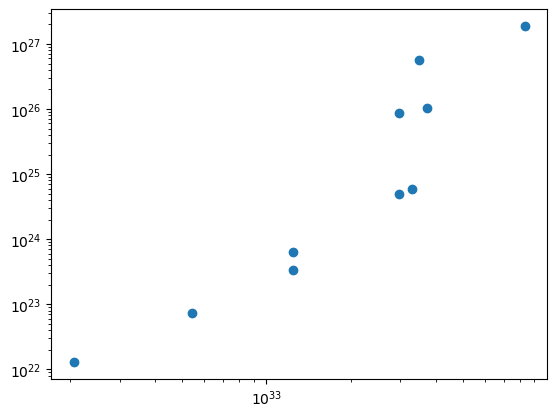

In [38]:
surface_gravity = (df['Mass (kg)'] * u.G) / (df['Diameter (AU)']/2)**2
y = df['Mass (kg)']

plt.figure()
plt.scatter(surface_gravity, y)
plt.yscale('log')
plt.xscale('log')
plt.show()

In [39]:
df.to_csv("units.csv", index=False)